In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv("train.csv", usecols=['GarageQual','FireplaceQu','SalePrice'])

In [107]:
df.head(3)

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500


In [108]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

## working with most frequently value

In [109]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

<Axes: xlabel='GarageQual'>

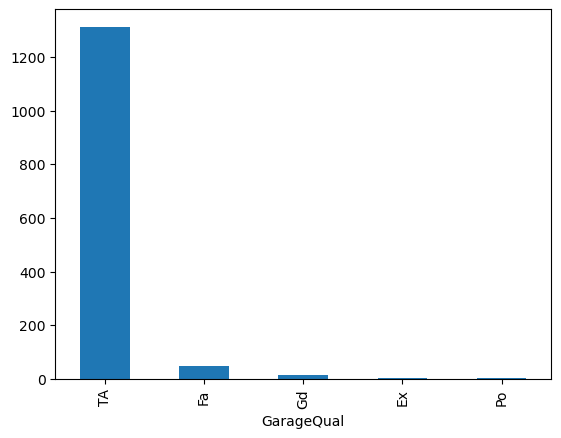

In [110]:
df['GarageQual'].value_counts().plot(kind='bar')

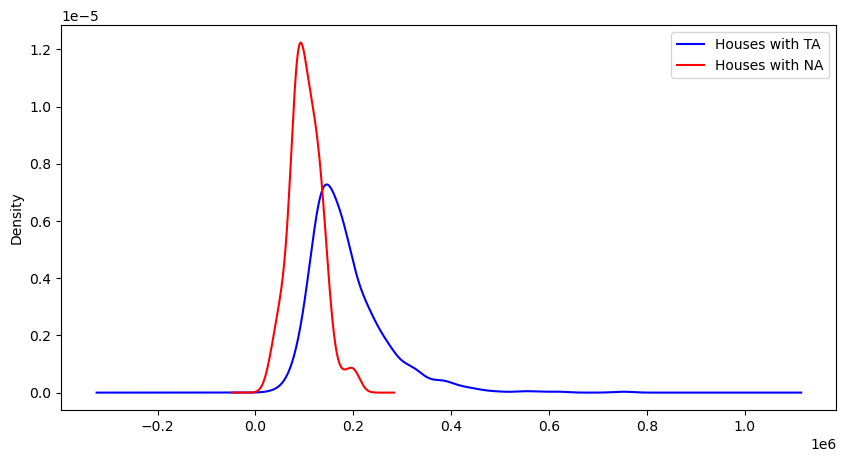

In [111]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='blue')
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, label = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')



In [112]:
df['new_garageQu'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])

In [113]:
df['GarageQual'].isnull().sum()

np.int64(81)

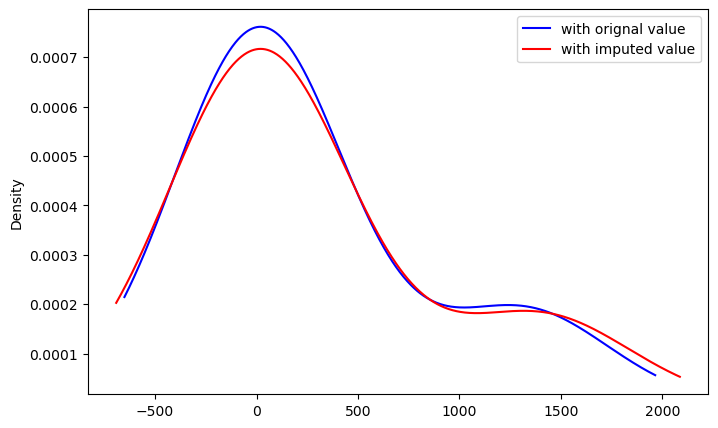

In [114]:
# before imputation and after imputation graph
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

df['GarageQual'].value_counts().plot(kind='kde', ax=ax, color='blue')

df['new_garageQu'].value_counts().plot(kind='kde', ax=ax, color='red')

lines, label = ax.get_legend_handles_labels()
labels = ['with orignal value', 'with imputed value']
ax.legend(lines, labels, loc='best')

#### through the sklearn 

In [115]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [116]:
impute = SimpleImputer(strategy='most_frequent')

x_train, x_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)


In [117]:
x_train.sample()

,FireplaceQu,GarageQual,new_garageQu
1345,NaN,TA,TA


In [118]:
x_train_impu = impute.fit_transform(x_train)
x_test_impu = impute.transform(x_test)

In [119]:
x_train_impu = pd.DataFrame(x_train_impu,columns=x_train.columns)
x_train_impu['GarageQual'].isnull().sum()

np.int64(0)

### working with missing category colums

In [120]:
dff = pd.read_csv('train.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])

In [121]:
dff.head(2)

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500


In [122]:
dff.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [123]:
dff['new_GarageQual'] = dff['GarageQual'].fillna('missing')

In [124]:
dff.isnull().sum()

FireplaceQu       690
GarageQual         81
SalePrice           0
new_GarageQual      0
dtype: int64

#### through sklearn

In [125]:
imp = SimpleImputer(strategy='constant', fill_value='missing')

x_train,x_test, y_train, y_test = train_test_split(dff.drop(columns=['SalePrice']), dff['SalePrice'], test_size=0.2, random_state=42)

In [126]:
x_train_imp = imp.fit_transform(x_train)
x_test_imp = imp.transform(x_test)

In [127]:
x_train_imp = pd.DataFrame(x_train_imp, columns=x_train.columns)
x_train_imp.isnull().sum()

FireplaceQu       0
GarageQual        0
new_GarageQual    0
dtype: int64

In [131]:
from sklearn.compose import ColumnTransformer

trf = ColumnTransformer([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing'), ['GarageQual','FireplaceQu'])
], remainder='passthrough')

x_train_trf = trf.fit_transform(x_train)
x_train_trf = pd.DataFrame(x_train_trf, columns=x_train.columns)
x_train_trf.isnull().sum()

FireplaceQu       0
GarageQual        0
new_GarageQual    0
dtype: int64